## Bayesian Belief networks along with graph visualization

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
fe_path = 'heart.csv'
data = pd.read_csv(fe_path)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
def bin_value(value, bins, labels):
    return pd.cut([value], bins=bins, labels=labels)[0]

data['chol_bin'] = pd.cut(data['chol'], bins=[0, 200, 239, np.inf], labels=['normal', 'borderline', 'high'])
data['trestbps_bin'] = pd.cut(data['trestbps'], bins=[0, 120, 129, np.inf], labels=['normal', 'elevated', 'high'])
data['thalach_bin'] = pd.cut(data['thalach'], bins=[0, 100, 150, np.inf], labels=['low', 'normal', 'high'])
data['oldpeak_bin'] = pd.cut(data['oldpeak'], bins=[-1, 1, 2, np.inf], labels=['low', 'moderate', 'high'])

In [8]:
p_heart_disease = len(data[data['target'] == 1]) / len(data)
p_no_heart_disease = 1 - p_heart_disease

In [9]:
print(p_heart_disease)
print(p_no_heart_disease)

0.5131707317073171
0.4868292682926829


In [25]:
def conditional_prob(feature, value, given_heart_disease=True):
    if given_heart_disease:
        subset = data[data['target'] == 1]
    else:
        subset = data[data['target'] == 0]
    return len(subset[subset[feature] == value]) / len(subset) if len(subset) > 0 else 0.01  # Avoid zero probability

In [26]:
def bayes_theorem(evidence):
    p_e_given_hd = 1  # P(Evidence | Heart Disease)
    p_e_given_no_hd = 1  # P(Evidence | No Heart Disease)
    
    for feature, value in evidence.items():
        p_e_given_hd *= conditional_prob(feature, value, True)
        p_e_given_no_hd *= conditional_prob(feature, value, False)
    
    # Apply Bayes' Theorem
    p_hd_given_evidence = (p_e_given_hd * p_heart_disease) / ((p_e_given_hd * p_heart_disease) + (p_e_given_no_hd * p_no_heart_disease))
    
    return p_hd_given_evidence

In [27]:
evidence = {'chol_bin': 'high', 'trestbps_bin': 'high', 'thalach_bin': 'normal', 'oldpeak_bin': 'moderate'}
prediction = bayes_theorem(evidence)

In [28]:
print("\nProbability of Heart Disease given Evidence:", prediction)


Probability of Heart Disease given Evidence: 0.1905011963372961


In [29]:
def visualize_bayesian_network():
    edges = [
        ('age', 'target'),
        ('sex', 'target'),
        ('cp', 'target'),
        ('trestbps_bin', 'target'),
        ('chol_bin', 'target'),
        ('fbs', 'target'),
        ('restecg', 'target'),
        ('thalach_bin', 'target'),
        ('exang', 'target'),
        ('oldpeak_bin', 'target'),
        ('slope', 'target'),
        ('ca', 'target'),
        ('thal', 'target')
    ]
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    plt.title("Bayesian Network for Heart Disease Diagnosis")
    plt.show()

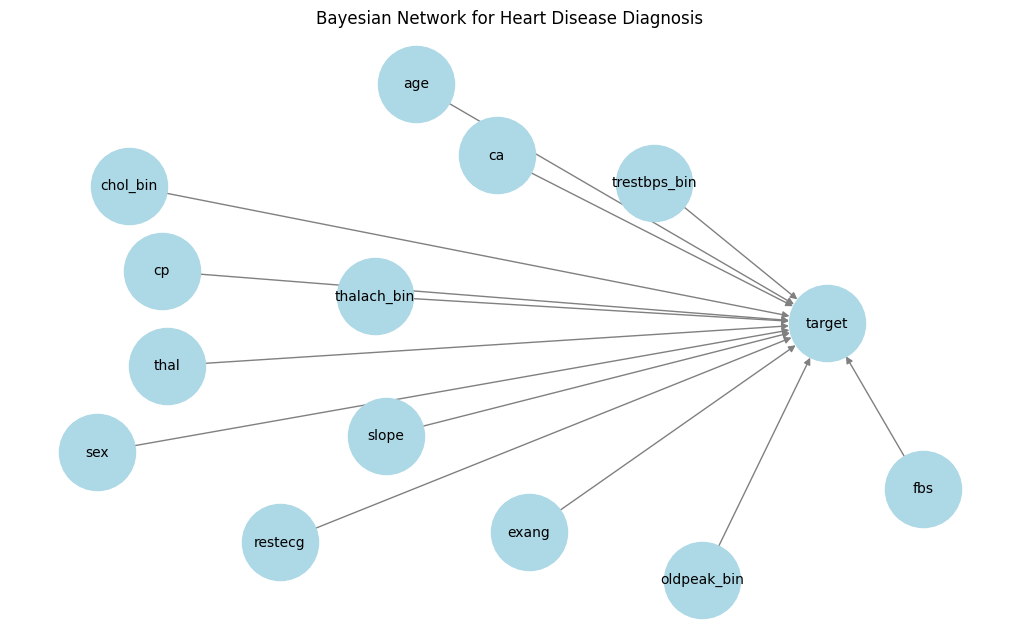

In [30]:
visualize_bayesian_network()
